# **Complete End to End Brain Tumor Detection Multi Class Image classification Using Deep Learning Models**

In [ ]:


#conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0
# Anything above 2.10 is not supported on the GPU on Windows Native
#python -m pip install "tensorflow<2.11"
# Verify the installation:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

Note: you may need to restart the kernel to use updated packages.
[]


ERROR: Could not find a version that satisfies the requirement tf-gpu (from versions: none)
ERROR: No matching distribution found for tf-gpu


In [10]:
%pip install tensorflow_hub
%pip install pandas
%pip install numpy
%pip install keras
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.10.0-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.10.0-cp310-cp310-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 13.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 13.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to us

In [11]:
import os
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tf_keras as keras


In [12]:
# Lets check the tensorflow version
print("Tensorflow Version", tf.__version__)
print("Tensorflow Hub Version",hub.__version__)
# make sure you have tensorflow version 2x

Tensorflow Version 2.18.0
Tensorflow Hub Version 0.16.1


In [13]:
# lets check GPU Availability
print("GPU", "Available" if tf.config.list_physical_devices("GPU") else "not available" )

GPU not available


In Google colab GPU is not available right now because i reached max limit so i decided to train on CPU But it will take long time its okay for me but i suggest you to you GPU to speed up training time

In [24]:
import os
import pandas as pd

# Define the base path of the dataset
base_path = "C:/Users/Shabiul/Downloads/multiple-disease-prediction-streamlit-app-main/dataset/Training"  # Use '/' for better cross-platform compatibility

# Empty list to store data
data = []

# Loop through each folder (class label) in the dataset
for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)
    
    # Ensure it's a directory
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            
            # Ensure it's a file (image)
            if os.path.isfile(file_path):
                data.append({"File_path": file_path, "Brain_tumor_type": folder_name})

# Create a DataFrame
df = pd.DataFrame(data)

# Display first few rows
print(df.head())

# Save the DataFrame to a CSV file
df.to_csv("brain_tumor_dataset.csv", index=False)
print("CSV file saved successfully!")


                                           File_path Brain_tumor_type
0  C:/Users/Shabiul/Downloads/multiple-disease-pr...           glioma
1  C:/Users/Shabiul/Downloads/multiple-disease-pr...           glioma
2  C:/Users/Shabiul/Downloads/multiple-disease-pr...           glioma
3  C:/Users/Shabiul/Downloads/multiple-disease-pr...           glioma
4  C:/Users/Shabiul/Downloads/multiple-disease-pr...           glioma
CSV file saved successfully!


In [25]:
df.head()

# our data frame is ready with file path

,File_path,Brain_tumor_type
0,C:/Users/Shabiul/Downloads/multiple-disease-pr...,glioma
1,C:/Users/Shabiul/Downloads/multiple-disease-pr...,glioma
2,C:/Users/Shabiul/Downloads/multiple-disease-pr...,glioma
3,C:/Users/Shabiul/Downloads/multiple-disease-pr...,glioma
4,C:/Users/Shabiul/Downloads/multiple-disease-pr...,glioma


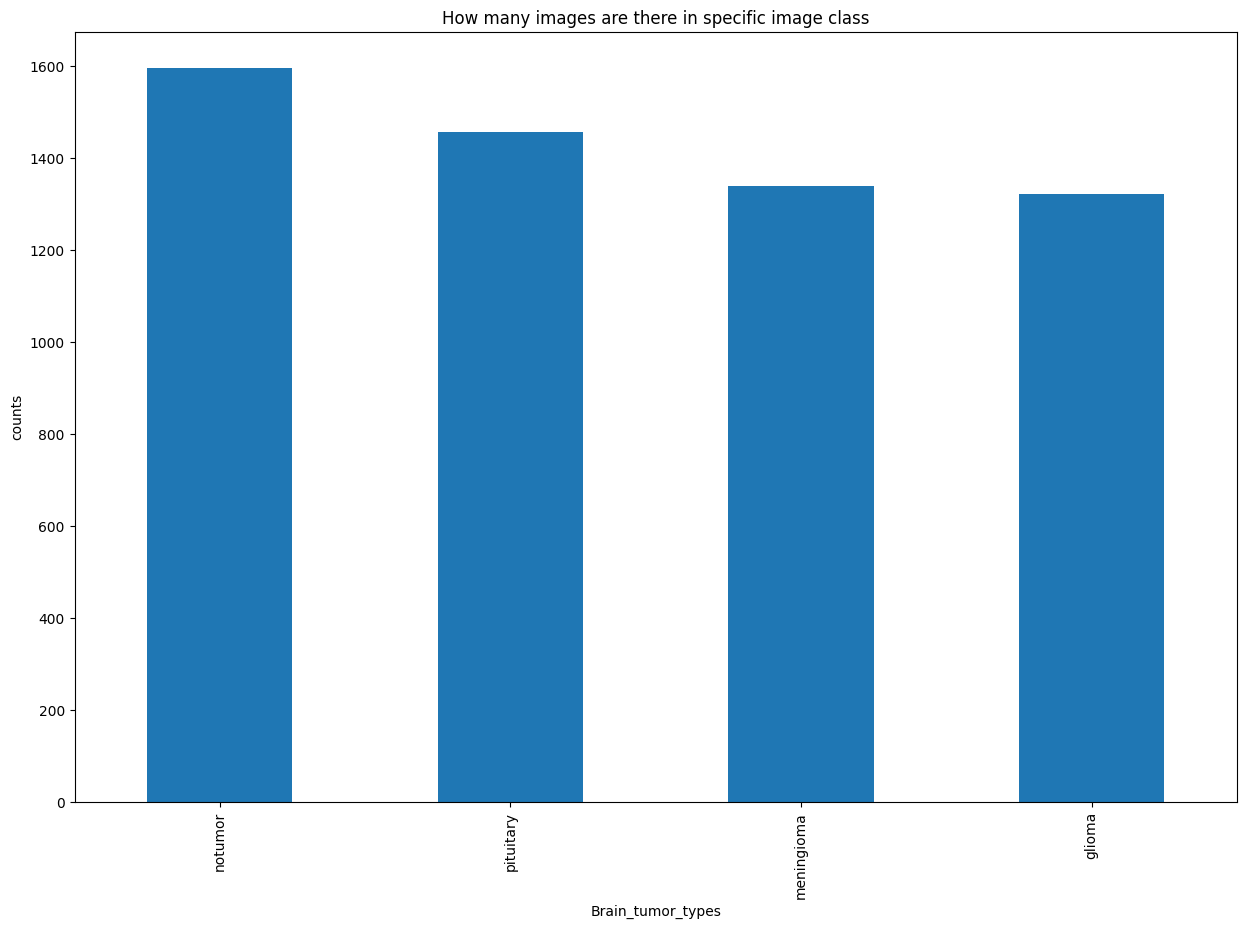

In [26]:
df["Brain_tumor_type"].value_counts().plot(kind="bar",
                                           xlabel="Brain_tumor_types",
                                           ylabel="counts",
                                           title="How many images are there in specific image class",
                                           figsize=(15,10))
plt.show()

In [27]:
# AVerage image for each specific class
df["Brain_tumor_type"].value_counts().mean()

np.float64(1428.0)

In [28]:
# extract file path from dataframe

file_names = [fname for fname in df["File_path"]]
file_names

['C:/Users/Shabiul/Downloads/multiple-disease-prediction-streamlit-app-main/dataset/Training\\glioma\\Tr-glTr_0000.jpg',
 'C:/Users/Shabiul/Downloads/multiple-disease-prediction-streamlit-app-main/dataset/Training\\glioma\\Tr-glTr_0001.jpg',
 'C:/Users/Shabiul/Downloads/multiple-disease-prediction-streamlit-app-main/dataset/Training\\glioma\\Tr-glTr_0002.jpg',
 'C:/Users/Shabiul/Downloads/multiple-disease-prediction-streamlit-app-main/dataset/Training\\glioma\\Tr-glTr_0003.jpg',
 'C:/Users/Shabiul/Downloads/multiple-disease-prediction-streamlit-app-main/dataset/Training\\glioma\\Tr-glTr_0004.jpg',
 'C:/Users/Shabiul/Downloads/multiple-disease-prediction-streamlit-app-main/dataset/Training\\glioma\\Tr-glTr_0005.jpg',
 'C:/Users/Shabiul/Downloads/multiple-disease-prediction-streamlit-app-main/dataset/Training\\glioma\\Tr-glTr_0006.jpg',
 'C:/Users/Shabiul/Downloads/multiple-disease-prediction-streamlit-app-main/dataset/Training\\glioma\\Tr-glTr_0007.jpg',
 'C:/Users/Shabiul/Downloads/mul

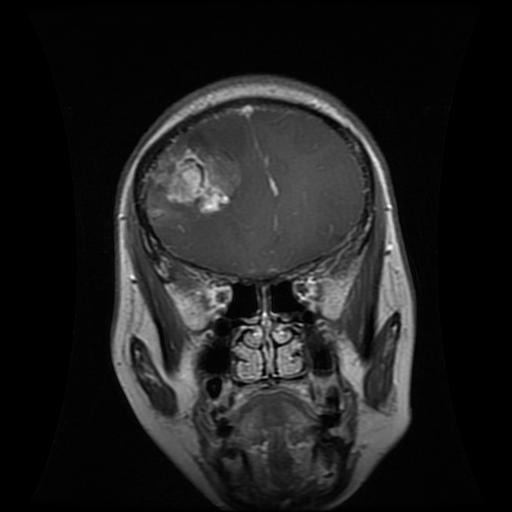

In [29]:
# make sure our file path working correctly
from IPython.display import Image

Image(file_names[0])

In [30]:
df["Brain_tumor_type"][0]

'glioma'

In [31]:
len(df)

5712

In [33]:
# lets check our file_names and actual folder images match

base_path = "C:/Users/Shabiul/Downloads/multiple-disease-prediction-streamlit-app-main/dataset/Training"
categories = ["glioma","meningioma","notumor","pituitary"]

total_files = sum(len(os.listdir(os.path.join(base_path,category))) for category in categories)

if len(file_names) == total_files:
  print("they match !!!!")
else:
  print("No it doesn't match :)")

they match !!!!


In [34]:
labels=df["Brain_tumor_type"]
labels=np.array(labels)
labels

array(['glioma', 'glioma', 'glioma', ..., 'pituitary', 'pituitary',
       'pituitary'], dtype=object)

In [35]:
# make sure file names and labels counts are equal

if len(file_names) == len(labels):
  print("They Match !")
else:
  print("No it doesn't match")

They Match !


In [36]:
unique_brain_tumor_types = np.unique(labels)
unique_brain_tumor_types

array(['glioma', 'meningioma', 'notumor', 'pituitary'], dtype=object)

In [37]:
len(unique_brain_tumor_types)

4

## So we have 4 types of brain tumor

In [38]:
boolean_labels=[label == np.array(unique_brain_tumor_types) for label in labels]
boolean_labels[:5]

[array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False]),
 array([ True, False, False, False])]

In [39]:
len(boolean_labels)

5712

In [40]:
file_names[:2]

['C:/Users/Shabiul/Downloads/multiple-disease-prediction-streamlit-app-main/dataset/Training\\glioma\\Tr-glTr_0000.jpg',
 'C:/Users/Shabiul/Downloads/multiple-disease-prediction-streamlit-app-main/dataset/Training\\glioma\\Tr-glTr_0001.jpg']

In [41]:
X=file_names
Y=boolean_labels

## **Lets Build Functions**

In [42]:
## Tuning Images into Tensor

IMG_SIZE = 224  # Image size

# data augmentation pipeline
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.1),
    keras.layers.RandomContrast(0.2)
])

def process_image(image_path, img_size=IMG_SIZE, augment=False):
    """
    Turn image into a Tensors
    """
    # Load and preprocess the image
    image = tf.io.read_file(image_path)  # Read image file as binary
    image = tf.image.decode_jpeg(image, channels=3)  # Decode JPEG to tensor
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)  # Normalize to [0, 1]
    image = tf.image.resize(image, size=[img_size, img_size])  # Resize to target size

    if augment:
        image = data_augmentation(image)

    return image

In [43]:
def get_image_label(image_path,label):
  image=process_image(image_path)
  return image, label

In [44]:
# Demo for above function
(process_image(X[42]),tf.constant(Y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], 

In [45]:
# Define the batch

BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, Y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(Y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(Y)))
    # Shuffling pathnames and labels before mapping image processor
    data = data.shuffle(buffer_size=len(X))

    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [46]:


import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_10_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 10 to display 10 images
  for i in range(10):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_brain_tumor_types[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [47]:
# Lets import model from kaggle hub
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_brain_tumor_types)

# Download latest version we are going to use resnet_v2_50 model
MODEL_URL = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

print("Path to model files:", MODEL_URL)

Path to model files: https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5


In [48]:
import tensorflow_hub as hub
layer = hub.KerasLayer(MODEL_URL, trainable=False)
layer
# model is ready to go

In [49]:
%pip install tf_keras

  Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
Using cached keras-3.8.0-py3-none-any.whl (1.3 MB)
Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl (434 kB)
Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
Using cached tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.6.1
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.1


In [50]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=keras.losses.CategoricalCrossentropy(),
      optimizer=keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [51]:
model=create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 2048)              23564800  
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 23572996 (89.92 MB)
Trainable params: 8196 (32.02 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


##Excellent

In [52]:
# Load TensorBoard notebook extension
%load_ext tensorboard

# this is the magic function

In [53]:
import datetime
import os


# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("/logs",

  # Make it so the logs get tracked whenever we run an experiment (%year%month%day-%hour%minites% seconds)
  datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return keras.callbacks.TensorBoard(logdir)

  # it will store model records in logdir (log folder) which is iam created specifically to store experiment data

In [54]:
# Create early stopping callback to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [55]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [56]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  model = create_model()
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=valid_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [57]:

def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_brain_tumor_types[np.argmax(prediction_probabilities)]

In [58]:
## lets unbatch then only we are able to visualize
# Create a function to unbatch a batch dataset

def unbatchify(data, include_labels=True):
    """
function for unbatch
    """
    images = []
    labels = []

    # Loop through unbatched data
    for item in data.unbatch().as_numpy_iterator():
        if include_labels:
            image, label = item
            images.append(image)
            labels.append(unique_brain_tumor_types[np.argmax(label)])
        else:
            image = item
            images.append(image)

    return (images, labels) if include_labels else images

In [59]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

In [60]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_brain_tumor_types[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

In [61]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("/content/drive/MyDrive/Colab Notebooks/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [62]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

## All functions are ready

In [63]:
len(X), len(Y)
# in this x contain file names and y contain boolean labels

(5712, 5712)

In [64]:
# Create a data batch with the full data set
# calling create_data_batches above function
full_data = create_data_batches(X, Y)

Creating training data batches...


In [65]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.bool, name=None))>

In [66]:
full_model = create_model() # create model function we created above

Building model with: https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5


In [67]:
# Create full model callbacks
# below create tensorboard also we are calling above function
full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopping = keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [68]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100



179/179 [==============================] - 81s 441ms/step - loss: 0.5687 - accuracy: 0.7903
Epoch 2/100
179/179 [==============================] - 78s 434ms/step - loss: 0.2909 - accuracy: 0.9004
Epoch 3/100
179/179 [==============================] - 73s 408ms/step - loss: 0.2222 - accuracy: 0.9279
Epoch 4/100
179/179 [==============================] - 73s 406ms/step - loss: 0.1851 - accuracy: 0.9380
Epoch 5/100
179/179 [==============================] - 73s 405ms/step - loss: 0.1598 - accuracy: 0.9505
Epoch 6/100
179/179 [==============================] - 76s 425ms/step - loss: 0.1428 - accuracy: 0.9519
Epoch 7/100
179/179 [==============================] - 74s 412ms/step - loss: 0.1254 - accuracy: 0.9622
Epoch 8/100
179/179 [==============================] - 74s 411ms/step - loss: 0.1139 - accuracy: 0.9653
Epoch 9/100
179/179 [==============================] - 74s 413ms/step - loss: 0.1033 - accuracy: 0.9695
Epoch 10/100
179/179 [==============================] - 81s 454ms/step - los

KeyboardInterrupt: 

In [ ]:
# lets visualize our full data model performance using tensorboard

%tensorboard --logdir  /content/drive/MyDrive/logs/20250105-060607

In [74]:
import os

# Ensure the directory exists
save_dir = "C:/Users/Shabiul/Downloads/multiple-disease-prediction-streamlit-app-main/saved_models"
os.makedirs(save_dir, exist_ok=True)

# Define the model save path
model_save_path = os.path.join(save_dir, "brain-tumor-detection-full-image-set-resnetv2_50.h5")

# Save the full model (architecture + weights + optimizer state)
full_model.save(model_save_path)

print(f"Model saved successfully at: {model_save_path}")


Model saved successfully at: C:/Users/Shabiul/Downloads/multiple-disease-prediction-streamlit-app-main/saved_models\brain-tumor-detection-full-image-set-resnetv2_50.h5


In [75]:
# now load our full data set trained model

loaded_full_model = load_model('C:/Users/Shabiul/Downloads/multiple-disease-prediction-streamlit-app-main/saved_models/brain-tumor-detection-full-image-set-resnetv2_50.h5')

Loading saved model from: C:/Users/Shabiul/Downloads/multiple-disease-prediction-streamlit-app-main/saved_models/brain-tumor-detection-full-image-set-resnetv2_50.h5


# **Excellent Lets Strat Prediction with Valid data**

In [76]:
valid_base_path = '/content/drive/MyDrive/Brain Tumour Project /valid data'

# Load valid data paths and labels
valid_data = []
for folder_name in os.listdir(valid_base_path):
    folder_path = os.path.join(valid_base_path, folder_name)
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            if os.path.isfile(file_path):
                valid_data.append({'File_Path': file_path, 'Brain_tumour_type': folder_name})

# Convert the list to a DataFrame
valid_df = pd.DataFrame(valid_data)

# Extract valid file paths and labels
X_valid = [fname for fname in valid_df["File_Path"]]
Y_valid = [unique_brain_tumor_types.tolist().index(label) for label in valid_df["Brain_tumour_type"]]


# Convert labels to one-hot encoding
Y_valid_one_hot = tf.keras.utils.to_categorical(Y_valid, num_classes=len(unique_brain_tumor_types))


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/Brain Tumour Project /valid data'

In [ ]:
valid_df

In [ ]:
valid_data_batch = create_data_batches(X_valid, Y_valid_one_hot, valid_data=True)
 # making batches for valid data # create data batch function we already created above see function section

In [ ]:
# Make predictions on the valid data
valid_predictions = loaded_full_model.predict(valid_data_batch, verbose=1)

# Convert prediction probabilities to labels
valid_pred_labels = [unique_brain_tumor_types[np.argmax(pred)] for pred in valid_predictions]


In [ ]:
# Convert one-hot encoded labels to original labels
valid_true_labels = [unique_brain_tumor_types[np.argmax(label)] for label in Y_valid_one_hot]

In [ ]:
valid_predictions

In [ ]:
# visualize our predictions with label

valid_images,_ = unbatchify(valid_data_batch)

num_images_to_display = 10

plt.figure(figsize=(15, 5 * num_images_to_display))

for i in range(num_images_to_display):
    # Plot the image and its predicted labels
    plt.subplot(num_images_to_display, 2, 2 * i + 1)
    plot_pred(prediction_probabilities=valid_predictions,
              labels=valid_true_labels,
              images=valid_images,
              n=i)

    # Plot the prediction confidence
    plt.subplot(num_images_to_display, 2, 2 * i + 2)
    plot_pred_conf(prediction_probabilities=valid_predictions,
                   labels=valid_true_labels,
                   n=i)

plt.tight_layout()
plt.show()


# **lets test our model with test data set here we go**

In [77]:
# our test data contains labels also

test_base_path = 'C:/Users/Shabiul/Downloads/multiple-disease-prediction-streamlit-app-main/dataset/Training'

# Load test data paths and labels
test_data = []
for folder_name in os.listdir(test_base_path):
    folder_path = os.path.join(test_base_path, folder_name)
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            if os.path.isfile(file_path):
                test_data.append({'File_Path': file_path, 'Brain_tumour_type': folder_name})


test_df = pd.DataFrame(test_data)

# Extract valid file paths and labels
X_test = [fname for fname in test_df["File_Path"]]
Y_test = [unique_brain_tumor_types.tolist().index(label) for label in test_df["Brain_tumour_type"]]


# Convert labels to one-hot encoding
Y_test_one_hot = tf.keras.utils.to_categorical(Y_test, num_classes=len(unique_brain_tumor_types))

In [78]:
test_df

,File_Path,Brain_tumour_type
0,C:/Users/Shabiul/Downloads/multiple-disease-pr...,glioma
1,C:/Users/Shabiul/Downloads/multiple-disease-pr...,glioma
2,C:/Users/Shabiul/Downloads/multiple-disease-pr...,glioma
3,C:/Users/Shabiul/Downloads/multiple-disease-pr...,glioma
4,C:/Users/Shabiul/Downloads/multiple-disease-pr...,glioma
...,...,...
5707,C:/Users/Shabiul/Downloads/multiple-disease-pr...,pituitary
5708,C:/Users/Shabiul/Downloads/multiple-disease-pr...,pituitary
5709,C:/Users/Shabiul/Downloads/multiple-disease-pr...,pituitary
5710,C:/Users/Shabiul/Downloads/multiple-disease-pr...,pituitary


In [79]:
test_data_batch = create_data_batches(X_test, Y_test_one_hot, test_data=True) # making batches

Creating test data batches...


In [80]:
# Make predictions on the test data
test_predictions = loaded_full_model.predict(test_data_batch, verbose=1)

# Convert prediction probabilities to labels
test_pred_labels = [unique_brain_tumor_types[np.argmax(pred)] for pred in test_predictions]

179/179 [==============================] - 79s 441ms/step


In [81]:
# Convert one-hot encoded labels to original labels
test_true_labels = [unique_brain_tumor_types[np.argmax(label)] for label in Y_test_one_hot]

In [82]:
test_predictions

array([[9.85349238e-01, 4.18939535e-03, 1.04612764e-02, 1.18662854e-07],
       [9.99817193e-01, 1.65029793e-04, 1.20480427e-05, 5.72158979e-06],
       [9.80250120e-01, 1.94151122e-02, 3.28723196e-04, 6.09830204e-06],
       ...,
       [6.02307264e-04, 2.23061442e-03, 2.29604229e-05, 9.97144163e-01],
       [4.58749868e-02, 2.90993918e-02, 2.29404512e-04, 9.24796164e-01],
       [1.88824226e-04, 2.35881004e-02, 2.14851229e-06, 9.76220965e-01]],
      dtype=float32)

In [84]:
%pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------- ----------------------------- 2.9/11.1 MB 15.2 MB/s eta 0:00:01
   ------------------- -------------------- 5.5/11.1 MB 14.0 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.1 MB 12.4 MB/s eta 0:00:01
   --------------------------------- ------ 9.4/11.1 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 11.0 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/43.9 MB ? eta -:--:--
   - -------------------------------------- 2.1/43.9 MB 9.8 MB/s eta 0:00:05
   --- ------------------------------------ 4.2/43.9 MB 10.5 MB/s eta 0:00:04
   ----- ---------------------------------- 6.6/43.9 MB 10.6 MB/s eta 0:00:04
   -------- ------------------------------- 9.4/43.9

In [85]:
# lets check test data accuracy
from sklearn.metrics import accuracy_score
accuracy_test = accuracy_score(test_true_labels, test_pred_labels)
print(f'Accuracy: {accuracy_test:.4f}')



Accuracy: 0.9837


##**Excellent our model achieved 80% accuracy in test data**
> I am consider this is a good improvement.on my previous attempt my model predict just 20% Successfully but know it reached 80% on my second attempt and this is my first deep learning project.so iam really happy for this improvement

##**Evaluation Metrics For Test Data**

In [87]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


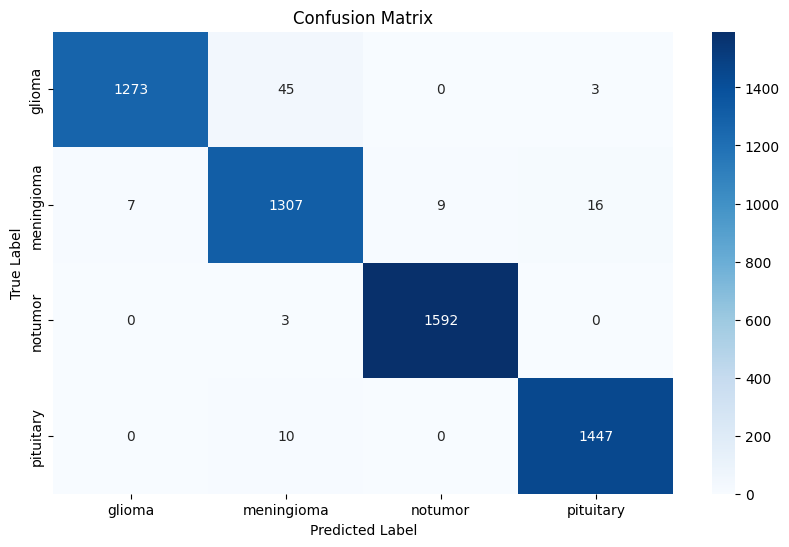

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
con_mx = confusion_matrix(test_true_labels, test_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(con_mx, annot=True, fmt='d', cmap='Blues', xticklabels=unique_brain_tumor_types, yticklabels=unique_brain_tumor_types)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [89]:
# classification report
from sklearn.metrics import classification_report

test_report = classification_report(test_true_labels, test_pred_labels, target_names=unique_brain_tumor_types)
print(test_report)

              precision    recall  f1-score   support

      glioma       0.99      0.96      0.98      1321
  meningioma       0.96      0.98      0.97      1339
     notumor       0.99      1.00      1.00      1595
   pituitary       0.99      0.99      0.99      1457

    accuracy                           0.98      5712
   macro avg       0.98      0.98      0.98      5712
weighted avg       0.98      0.98      0.98      5712



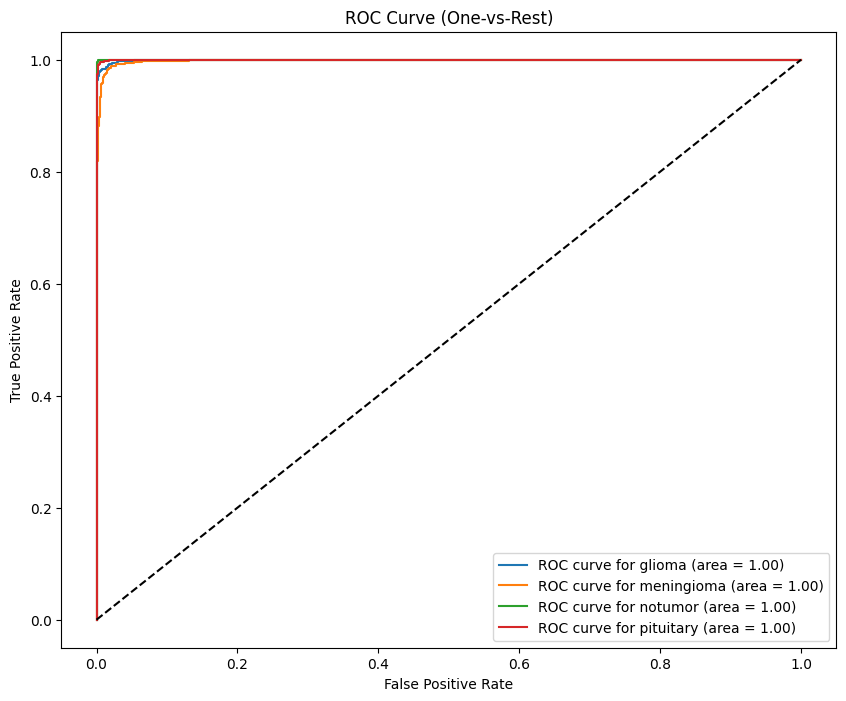

In [90]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# One-hot encode the true labels for multi-class ROC
test_true_labels_bin = label_binarize(test_true_labels, classes=unique_brain_tumor_types)

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(unique_brain_tumor_types)):
    fpr[i], tpr[i], _ = roc_curve(test_true_labels_bin[:, i], test_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(unique_brain_tumor_types)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for {unique_brain_tumor_types[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()

# **THANK YOU**

In [92]:
%pip install image

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ----------- ---------------------------- 2.4/8.3 MB 14.9 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.3 MB 13.8 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.3 MB 13.5 MB/s eta 0:00:01
   ---------------------------------------- 8.3/8.3 MB 13.1 MB/s eta 0:00:00
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19535 sha256=6a1f2df88d87bee33c27e2be35cbb2e58f16becc4d95294b04ddd60e20458dee
  Stored in directory: c:\users\shabiul\appdata\local\pip\cache\wheels\70\0c\a4\7cfa53a5c6225c2db2bfec08e782b43d0f25fdae2e995b69be
Successfully built image
Note: you may need to restart the kernel to use updated packages.


NameError: name 'image' is not defined